In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = "C:\\Users\\HomePC\\Downloads\\QVI_data.csv"

data = pd.read_csv(filepath)
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [4]:
# Create YEARMONTH column in yyyymm format
# This format makes it super easy to:
# - Sort chronologically
# - Filter by month ranges
# - Group by month for metrics

data['YEARMONTH'] = pd.to_datetime(data['DATE']).dt.strftime('%Y%m').astype(int)
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [8]:
measure_over_time = (
    data.groupby(['STORE_NBR','YEARMONTH'])
        .agg(
            totSales=('TOT_SALES','sum'),
            nCustomers=('LYLTY_CARD_NBR','nunique'),
            nTransactions=('TXN_ID','nunique')
        )
        .reset_index()
)

# Transactions per customer
measure_over_time['nTxnPerCust'] = (
    measure_over_time['nTransactions'] / measure_over_time['nCustomers']
)

In [9]:
def calculate_correlation(input_df, metric, trial_store):
    trial_series = input_df.loc[input_df['STORE_NBR']==trial_store, metric]
    results = []
    for store in input_df['STORE_NBR'].unique():
        if store != trial_store:
            store_series = input_df.loc[input_df['STORE_NBR']==store, metric]
            corr = trial_series.corr(store_series)
            results.append({'Store1': trial_store, 'Store2': store, 'corr_measure': corr})
    return pd.DataFrame(results)

def calculate_magnitude_distance(input_df, metric, trial_store):
    trial_series = input_df.loc[input_df['STORE_NBR']==trial_store, ['YEARMONTH', metric]]
    results = []
    for store in input_df['STORE_NBR'].unique():
        if store != trial_store:
            store_series = input_df.loc[input_df['STORE_NBR']==store, ['YEARMONTH', metric]]
            merged = trial_series.merge(store_series, on='YEARMONTH', suffixes=('_trial','_control'))
            merged['measure'] = abs(merged[f'{metric}_trial'] - merged[f'{metric}_control'])
            mag_measure = 1 - (merged['measure'] - merged['measure'].min())/(merged['measure'].max()-merged['measure'].min())
            results.append({'Store1': trial_store, 'Store2': store, 'mag_measure': mag_measure.mean()})
    return pd.DataFrame(results)

In [15]:
calculate_correlation

<function __main__.calculate_correlation(input_df, metric, trial_store)>

In [11]:
def select_control_store(input_df, trial_store, metric_list=['totSales','nCustomers']):
    scores = []
    for metric in metric_list:
        corr = calculate_correlation(input_df, metric, trial_store)
        mag = calculate_magnitude_distance(input_df, metric, trial_store)
        merged = corr.merge(mag, on=['Store1','Store2'])
        merged[f'score_{metric}'] = 0.5*merged['corr_measure'] + 0.5*merged['mag_measure']
        scores.append(merged[['Store1','Store2',f'score_{metric}']])
    final = scores[0].merge(scores[1], on=['Store1','Store2'])
    final['finalControlScore'] = 0.5*final['score_totSales'] + 0.5*final['score_nCustomers']
    return final.sort_values('finalControlScore', ascending=False)

In [13]:
measure_over_time

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTransactions,nTxnPerCust
0,1,201807,206.9,49,52,1.061224
1,1,201808,176.1,42,43,1.023810
2,1,201809,278.8,59,62,1.050847
3,1,201810,188.1,44,45,1.022727
4,1,201811,192.6,46,47,1.021739
...,...,...,...,...,...,...
3164,272,201902,395.5,45,48,1.066667
3165,272,201903,442.3,50,53,1.060000
3166,272,201904,445.1,54,55,1.018519
3167,272,201905,314.6,34,40,1.176471


In [20]:
trial_store = 77
control_candidates = select_control_store(measure_over_time, trial_store)
control_store = control_candidates.iloc[0]['Store2']
print("Selected control store:", control_store)

Selected control store: 1.0


In [22]:
trial_store = 86
control_candidates = select_control_store(measure_over_time, trial_store)
control_store = control_candidates.iloc[0]['Store2']
print("Selected control store:", control_store)



Selected control store: 1.0


In [23]:
trial_store = 88
control_candidates = select_control_store(measure_over_time, trial_store)
control_store = control_candidates.iloc[0]['Store2']
print("Selected control store:", control_store)

Selected control store: 1.0


In [25]:
import numpy as np

In [26]:
# Scale control sales to trial sales pre-trial
pre_trial = measure_over_time[(measure_over_time['YEARMONTH']<201902)]
scaling_factor = (
    pre_trial.loc[pre_trial['STORE_NBR']==trial_store,'totSales'].sum() /
    pre_trial.loc[pre_trial['STORE_NBR']==control_store,'totSales'].sum()
)

measure_over_time['controlSales'] = np.where(
    measure_over_time['STORE_NBR']==control_store,
    measure_over_time['totSales']*scaling_factor,
    np.nan
)

# Percentage difference during trial
trial_period = measure_over_time[(measure_over_time['YEARMONTH']>=201902) & (measure_over_time['YEARMONTH']<=201904)]
trial_vs_control = trial_period.pivot(index='YEARMONTH', columns='STORE_NBR', values=['totSales','controlSales'])
trial_vs_control['percDiff'] = (trial_vs_control['totSales',trial_store] - trial_vs_control['controlSales',control_store]) / trial_vs_control['controlSales',control_store]

In [27]:
trial_period

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTransactions,nTxnPerCust,controlSales
7,1,201902,225.4,52,55,1.057692,1525.029519
8,1,201903,192.9,45,49,1.088889,1305.138395
9,1,201904,192.9,42,43,1.023810,1305.138395
19,2,201902,139.4,29,32,1.103448,NaN
20,2,201903,192.1,43,46,1.069767,NaN
...,...,...,...,...,...,...,...
3153,271,201903,735.8,79,101,1.278481,NaN
3154,271,201904,774.6,87,109,1.252874,NaN
3164,272,201902,395.5,45,48,1.066667,NaN
3165,272,201903,442.3,50,53,1.060000,NaN


In [28]:
trial_vs_control

totSales                                                             \
STORE_NBR        1      2       3       4      5      6       7      8      9   
YEARMONTH                                                                       
201902       225.4  139.4  1197.7   883.4  727.0  224.0  1026.4  345.4  259.4   
201903       192.9  192.1  1124.4  1192.4  681.4  179.5  1145.8  441.4  367.6   
201904       192.9  196.5   920.0  1230.5  721.8  197.9   942.4  364.8  267.6   

                  ... controlSales                                  percDiff  
STORE_NBR     10  ...          264 265 266 267 268 269 270 271 272            
YEARMONTH         ...                                                         
201902     853.0  ...          NaN NaN NaN NaN NaN NaN NaN NaN NaN -0.101526  
201903     862.0  ...          NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.131834  
201904     746.2  ...          NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.102872  

[3 rows x 537 columns]

In [29]:
from scipy.stats import t

TRIAL_STORES = [77, 86, 88]

def run_trial_assessment(measure_over_time, trial_store):
    # Step 1: Select control store
    final_scores = select_control_store(measure_over_time, trial_store)
    control_store = final_scores.loc[final_scores['Store2'] != trial_store].iloc[0]['Store2']

    # Step 2: Scale control sales to match trial store (pre-trial)
    pre = measure_over_time[measure_over_time['YEARMONTH'] < 201902]
    sf_sales = (
        pre.loc[pre['STORE_NBR']==trial_store, 'totSales'].sum() /
        pre.loc[pre['STORE_NBR']==control_store, 'totSales'].sum()
    )

    mot = measure_over_time.copy()
    mot['controlSales'] = np.where(
        mot['STORE_NBR']==control_store,
        mot['totSales'] * sf_sales,
        np.nan
    )

    # Step 3: Calculate uplift during trial
    trial_period = mot[(mot['YEARMONTH'] >= 201902) & (mot['YEARMONTH'] <= 201904)]
    trial_pivot = trial_period.pivot(index='YEARMONTH', columns='STORE_NBR', values=['totSales','controlSales'])
    trial_pivot['percDiff'] = (
        (trial_pivot['totSales', trial_store] - trial_pivot['controlSales', control_store]) /
        trial_pivot['controlSales', control_store]
    )

    # Step 4: Statistical test
    pre_pivot = pre.pivot(index='YEARMONTH', columns='STORE_NBR', values=['totSales','controlSales'])
    pre_pivot['percDiff'] = (
        (pre_pivot['totSales', trial_store] - pre_pivot['controlSales', control_store]) /
        pre_pivot['controlSales', control_store]
    )
    std_dev = pre_pivot['percDiff'].std()
    df = len(pre_pivot) - 1
    t_crit = t.ppf(0.95, df)

    trial_pivot['tValue'] = trial_pivot['percDiff'] / std_dev
    sig_months = (trial_pivot['tValue'] > t_crit).sum()
    recommendation = "✅ Roll out" if sig_months >= 2 else "❌ Do not roll out"

    # Step 5: Print summary
    print(f"\n📍 Trial Store {trial_store} vs Control Store {int(control_store)}")
    print(trial_pivot[['percDiff','tValue']])
    print(f"Significant uplift months: {sig_months} / 3")
    print(f"Recommendation: {recommendation}")

    return {
        'trial_store': trial_store,
        'control_store': int(control_store),
        'significant_months': int(sig_months),
        'recommendation': recommendation,
        'trial_stats': trial_pivot[['percDiff','tValue']]
    }

# Run for all trial stores
results = []
for ts in TRIAL_STORES:
    res = run_trial_assessment(measure_over_time, ts)
    results.append(res)


📍 Trial Store 77 vs Control Store 1
           percDiff    tValue
STORE_NBR                    
YEARMONTH                    
201902    -0.148929 -4.313734
201903     0.178541  5.171445
201904     0.115065  3.332857
Significant uplift months: 2 / 3
Recommendation: ✅ Roll out

📍 Trial Store 86 vs Control Store 1
           percDiff    tValue
STORE_NBR                    
YEARMONTH                    
201902    -0.081844 -0.812001
201903     0.206307  2.046838
201904    -0.003516 -0.034881
Significant uplift months: 1 / 3
Recommendation: ❌ Do not roll out

📍 Trial Store 88 vs Control Store 1
           percDiff    tValue
STORE_NBR                    
YEARMONTH                    
201902    -0.101526 -0.702583
201903     0.131834  0.912325
201904     0.102872  0.711898
Significant uplift months: 0 / 3
Recommendation: ❌ Do not roll out


In [33]:
# Pre-trial percentage differences
pre = measure_over_time[measure_over_time['YEARMONTH'] < 201902]
pre_pivot = pre.pivot(index='YEARMONTH', columns='STORE_NBR', values=['totSales','controlSales'])
pre_pivot['percDiff'] = (
    (pre_pivot['totSales', trial_store] - pre_pivot['controlSales', control_store]) /
    pre_pivot['controlSales', control_store]
)

# Standard deviation of pre-trial differences
std_dev = pre_pivot['percDiff'].std()

In [34]:
def plot_trial_vs_control(measure_over_time, trial_store, control_store, std_dev):
    # Prepare data
    mot = measure_over_time.copy()
    mot['Store_type'] = mot['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other')
    )
    mot['TransactionMonth'] = pd.to_datetime(mot['YEARMONTH'], format='%Y%m')

    # Filter only trial + control
    pastSales = mot[mot['Store_type'].isin(['Trial','Control'])].groupby(
        ['YEARMONTH','Store_type','TransactionMonth']
    )['totSales'].mean().reset_index()

    # Confidence intervals (±2 std dev)
    pastSales_Controls95 = pastSales[pastSales['Store_type']=='Control'].copy()
    pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + std_dev*2)
    pastSales_Controls95['Store_type'] = 'Control 95% CI'

    pastSales_Controls5 = pastSales[pastSales['Store_type']=='Control'].copy()
    pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - std_dev*2)
    pastSales_Controls5['Store_type'] = 'Control 5% CI'

    trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

    # Plot
    plt.figure(figsize=(10,6))
    plt.axvspan(pd.to_datetime("201902", format="%Y%m"),
                pd.to_datetime("201904", format="%Y%m"),
                color='grey', alpha=0.2, label='Trial Period')
    sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type')
    plt.title(f"Trial Store {trial_store} vs Control Store {control_store}")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.legend()
    plt.show()

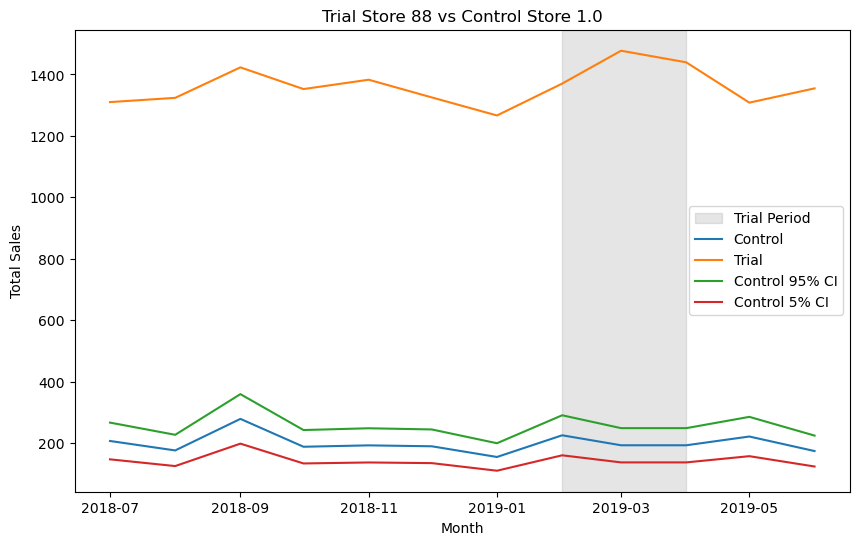

In [35]:
plot_trial_vs_control(measure_over_time, trial_store, control_store, std_dev)